In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Loading the dataset
train_df = pd.read_csv('./datasets/train.csv')
test_df = pd.read_csv('./datasets/test.csv')

In [3]:
# Getting insight on first five rows of the dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Getting insight on last five rows of the dataset
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Dataset Description**
- Survived: Survival | 0 = No, 1 = Yes
- Pclass: Ticket Class | 1 = 1st, 2 = 2nd, 3 = 3rd
- SibSp: No. of Siblings / Spouses aboard
- Parch: No. of Parents / Children aboard
- Ticket: Ticket Number
- Cabin: Cabin Number
- Embarked: Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton


## Getting Quick Summary Statistics of the Dataset

In [5]:
# Detailed info of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Getting summary statistics of numerical columns
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observation**
- About 38.3% of passengers survived; meaning rest 61.7% of passengers did not survive the disaster.
- More passengers were in lowerclass.
- High standard deviation in ticket fare shows large variation in ticket prices.

In [7]:
# Checking for any duplicate rows
train_df.duplicated().sum()

0

In [8]:
# Checking for null values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning

**Filling Missing Values in Age Column with Median**

In [9]:
# Filling Age column with median
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

**Splitting Cabin Column into Binary Column & Checking Its Effect on Survival Rate**

In [10]:
# Converting Cabin column into new Binary column
train_df.loc[:, 'Has_Cabin'] = train_df['Cabin'].notnull().astype(int)
train_df = train_df.drop('Cabin', axis=1)

test_df.loc[:, 'Has_Cabin'] = test_df['Cabin'].notnull().astype(int)
test_df = test_df.drop('Cabin', axis=1)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


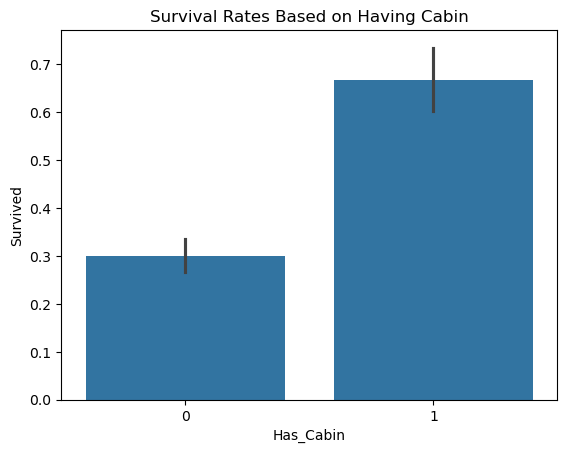

In [11]:
# Checking if having cabin significantly affected the survival rate
sns.barplot(data=train_df, x='Has_Cabin', y='Survived')
plt.title('Survival Rates Based on Having Cabin')
plt.show()

**Interpretation:** We could see that most of the passengers on cabin has survived the disaster.

**Dropping rows with missing Embarked values**

In [12]:
train_df = train_df.dropna(subset=['Embarked'])
test_df = test_df.dropna(subset=['Embarked'])

In [13]:
# Checking the cleaned data
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

In [14]:
# Checking test dataset
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Has_Cabin      0
dtype: int64

**Conclusion**: There are no missing values in the dataframe

**Dropping Insignificant Columns**

In [15]:
train_df = train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Fare'], axis=1)
test_df = test_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Fare'], axis=1)

In [16]:
# Checking cleaned dataset
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Has_Cabin
0,0,3,male,22.0,1,0,S,0
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   889 non-null    int64  
 1   Pclass     889 non-null    int64  
 2   Sex        889 non-null    object 
 3   Age        889 non-null    float64
 4   SibSp      889 non-null    int64  
 5   Parch      889 non-null    int64  
 6   Embarked   889 non-null    object 
 7   Has_Cabin  889 non-null    int32  
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 59.0+ KB


## Exploratory Data Analysis

**Analyzing how survival rate is affected by ticket class, gender, port of embarkation & having cabin**

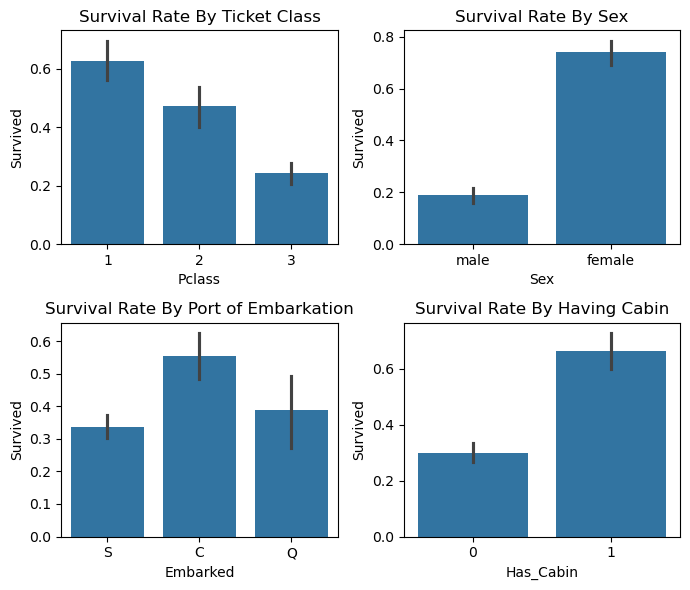

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(7, 6))

sns.barplot(train_df, x='Pclass', y='Survived', ax=axes[0, 0])
axes[0, 0].set_title('Survival Rate By Ticket Class')

sns.barplot(train_df, x='Sex', y='Survived', ax=axes[0, 1])
axes[0, 1].set_title('Survival Rate By Sex')

sns.barplot(train_df, x='Embarked', y='Survived', ax=axes[1, 0])
axes[1, 0].set_title('Survival Rate By Port of Embarkation')

sns.barplot(train_df, x='Has_Cabin', y='Survived', ax=axes[1, 1])
axes[1, 1].set_title('Survival Rate By Having Cabin')

plt.tight_layout()
plt.show()

**Observation**
- People on 1st class have more survival rate passengers on lower classes.
- Female passengers have more survival rate than male passengers.
- Passengers having cabin have more survival rate than those not having cabin.
- Passengers who embarked from Cherbourg have more survival rate. _( I don't think this variable has significant effect on the survival rate practically._

**Analyzing how age factor has effect on the survival rate**

In [19]:
# Creating age bins
age_bins = [0, 18, 30, 40, 60, 100]
age_labels = ['0-18', '19-30', '31-40', '41-60', '61+']
train_df['Age_Interval'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, right=True)
test_df['Age_Interval'] = pd.cut(test_df['Age'], bins=age_bins, labels=age_labels, right=True)

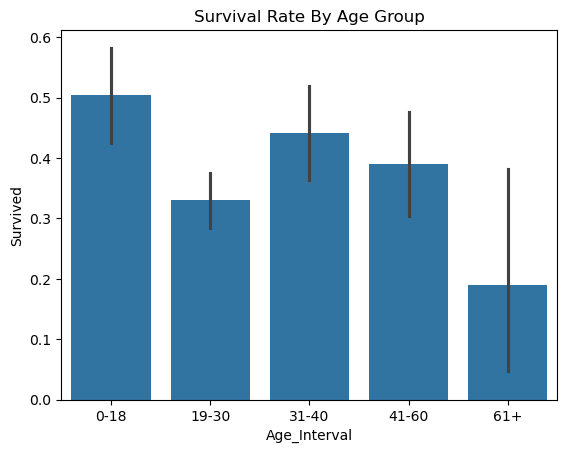

In [20]:
sns.barplot(train_df, x='Age_Interval', y='Survived')
plt.title('Survival Rate By Age Group')
plt.show()

**Observation**
- We could see have passengers with old age have lesser survival rate
- Also we could see that passengers between 19-30 have survived less which is some unique insight of the disaster.

## Date Preprocessing

**Label Encoding the Sex Column**

In [21]:
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
test_df['Sex'] = label_encoder.fit_transform(test_df['Sex'])

In [22]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Has_Cabin,Age_Interval
0,0,3,1,22.0,1,0,S,0,19-30
1,1,1,0,38.0,1,0,C,1,31-40
2,1,3,0,26.0,0,0,S,0,19-30
3,1,1,0,35.0,1,0,S,1,31-40
4,0,3,1,35.0,0,0,S,0,31-40


**One-Hot Encoding Embarked Column**

In [23]:
train_df = pd.get_dummies(train_df, columns=['Embarked'])
test_df = pd.get_dummies(test_df, columns=['Embarked'])

In [24]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Has_Cabin,Age_Interval,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,0,19-30,False,False,True
1,1,1,0,38.0,1,0,1,31-40,True,False,False
2,1,3,0,26.0,0,0,0,19-30,False,False,True
3,1,1,0,35.0,1,0,1,31-40,False,False,True
4,0,3,1,35.0,0,0,0,31-40,False,False,True


**Dropping Unwanted Columns**

In [25]:
train_df = train_df.drop(columns=['Age_Interval'], axis=1)
test_df = test_df.drop(columns=['Age_Interval'], axis=1)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Has_Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,0,False,False,True
1,1,1,0,38.0,1,0,1,True,False,False
2,1,3,0,26.0,0,0,0,False,False,True
3,1,1,0,35.0,1,0,1,False,False,True
4,0,3,1,35.0,0,0,0,False,False,True


**Checking the distribution of the dataset**
<p><i>The following code for visualizing a histogram and normal distribution curve was referenced from ChatGPT.</i></p>

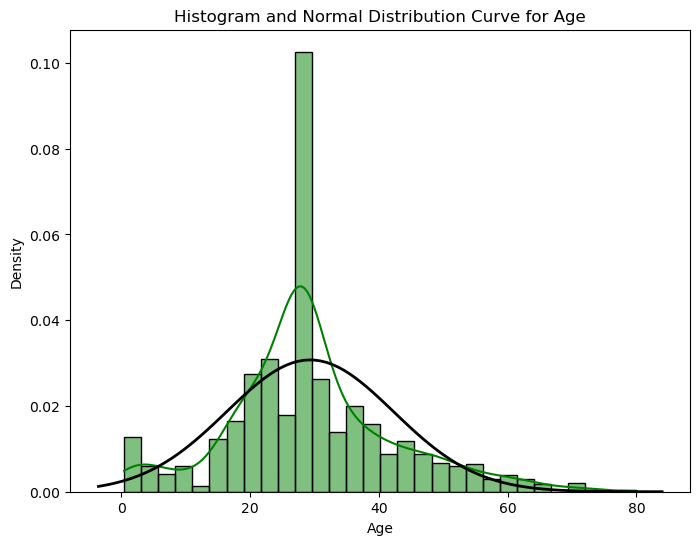

In [26]:
# Plotting histogram and normal distribution curve for 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'], kde=True, stat="density", bins=30, color='green')

# Fit a normal distribution to the data
mu, std = stats.norm.fit(train_df['Age'])

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Set title and labels
plt.title('Histogram and Normal Distribution Curve for Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Reference: GPT

**Scaling & Splitting Data For Model Training**

In [27]:
X_train = train_df.drop(columns=['Survived'])

In [28]:
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)

In [29]:
# Converting X_scaled back to dataframe
X_train = pd.DataFrame(X_trainScaled, columns=X_train.columns)

In [30]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Has_Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0.825209,0.735342,-0.563674,0.431350,-0.474326,-0.542247,-0.482711,-0.307941,0.616794
1,-1.572211,-1.359911,0.669217,0.431350,-0.474326,1.844177,2.071634,-0.307941,-1.621287
2,0.825209,-1.359911,-0.255451,-0.475199,-0.474326,-0.542247,-0.482711,-0.307941,0.616794
3,-1.572211,-1.359911,0.438050,0.431350,-0.474326,1.844177,-0.482711,-0.307941,0.616794
4,0.825209,0.735342,0.438050,-0.475199,-0.474326,-0.542247,-0.482711,-0.307941,0.616794


In [31]:
X_testScaled = scaler.fit_transform(test_df)
X_test = pd.DataFrame(X_testScaled, columns=test_df.columns)

In [32]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Has_Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0.873482,0.755929,0.386231,-0.499470,-0.400248,-0.52753,-0.568142,2.843757,-1.350676
1,0.873482,-1.322876,1.371370,0.616992,-0.400248,-0.52753,-0.568142,-0.351647,0.740370
2,-0.315819,0.755929,2.553537,-0.499470,-0.400248,-0.52753,-0.568142,2.843757,-1.350676
3,0.873482,0.755929,-0.204852,-0.499470,-0.400248,-0.52753,-0.568142,-0.351647,0.740370
4,0.873482,-1.322876,-0.598908,0.616992,0.619896,-0.52753,-0.568142,-0.351647,0.740370


In [33]:
y_train = train_df.drop(columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Has_Cabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S'])
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [34]:
y_train.shape

(889, 1)

## Model Training & Evaluation

In [35]:
# Training the model
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
model2 = LogisticRegression()
y_train = y_train.values.ravel()
model2.fit(X_train, y_train)

LogisticRegression()

In [37]:
# Making Prediction
y_pred1 = model1.predict(X_test)

In [38]:
y_pred2 = model2.predict(X_test)

In [45]:
test_df = pd.read_csv('./datasets/test.csv')
output_df1 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred1
})
output_df2 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred2
})

In [46]:
output_df1.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [47]:
output_df2.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## Exporting Predictions

In [48]:
output_df1.to_csv('titanic_predictions1.csv', index=False)
output_df2.to_csv('titanic_predictions2.csv', index=False)